# Importando base de dados

In [1]:
import pandas as pd

In [2]:
pd.read_csv('tips.csv')

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [3]:
dados = pd.read_csv('tips.csv')

In [4]:
dados.head(10)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


# Tradução

In [5]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [6]:
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoas'
    }

In [7]:
gorjetas = dados.rename(columns = renomear)

In [8]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [9]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [11]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [12]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [13]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [14]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [15]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta-feira',
    'Fri' : 'Sexta-Feira'
}

In [16]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [17]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [18]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [19]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [20]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [21]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# Importando o Seaborn

In [22]:
!pip install seaborn==0.9.0

In [23]:
import seaborn as sns

In [24]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\senai\anaconda3\lib\site-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: 


# Análise 1 - Valor da conta e da gorjeta

In [25]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

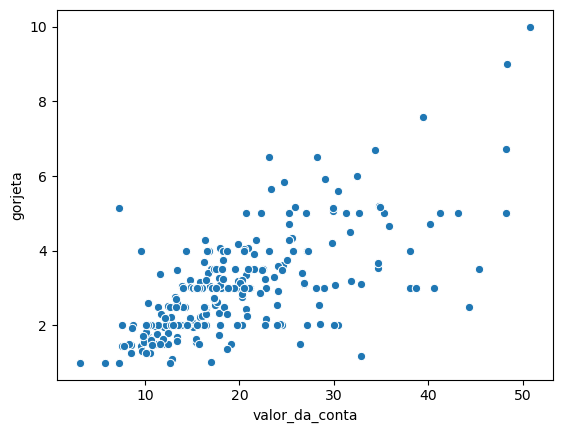

In [26]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

### Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta

In [27]:
print(f'A base de dados contém {gorjetas.shape[0]} registros\n')
print('Registros não nulo')
gorjetas.count()

A base de dados contém 244 registros

Registros não nulo


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [28]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [41]:
gorjetas['porcentagem'] = (gorjetas['gorjeta'] / gorjetas['valor_da_conta']) * 100

In [42]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.944673


In [43]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [44]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94


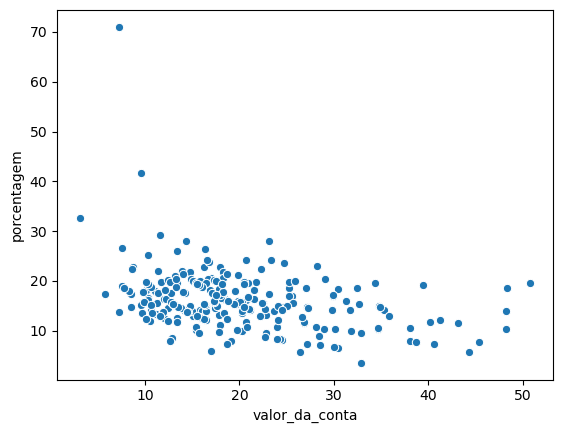

In [45]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

## Visualmente, o valor da conta não é proporcional ao valor da gorjeta

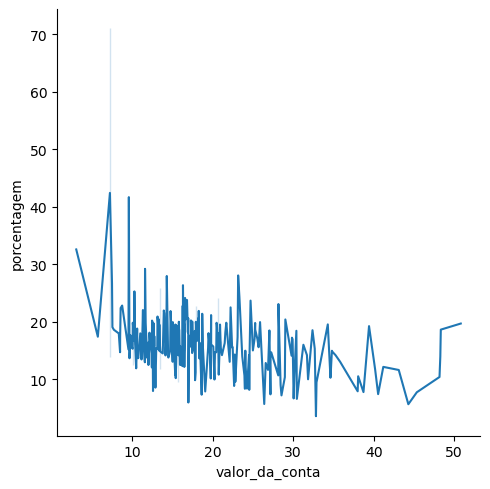

In [47]:
porcetagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

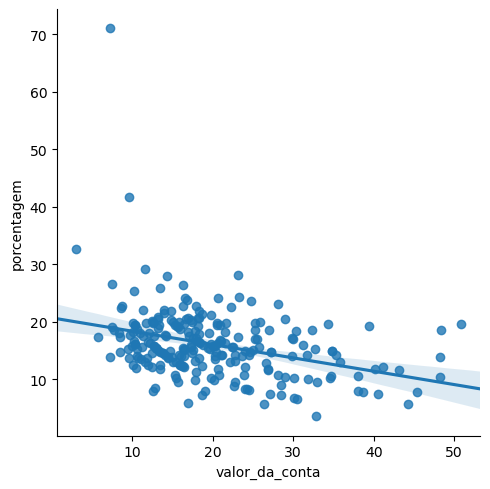

In [48]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

# Salvando gráficos como imagens

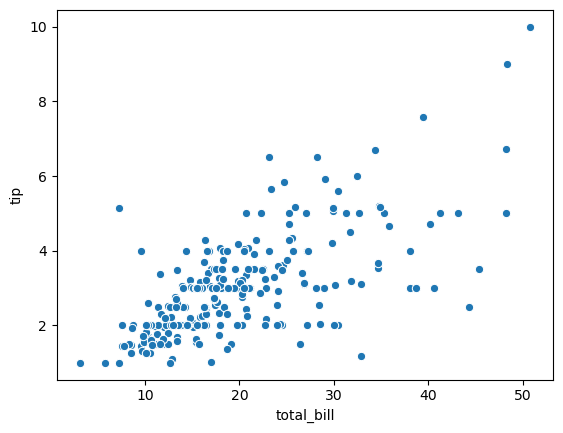

In [54]:
primeiro_plot = sns.scatterplot(x='total_bill', y='tip', data=dados)

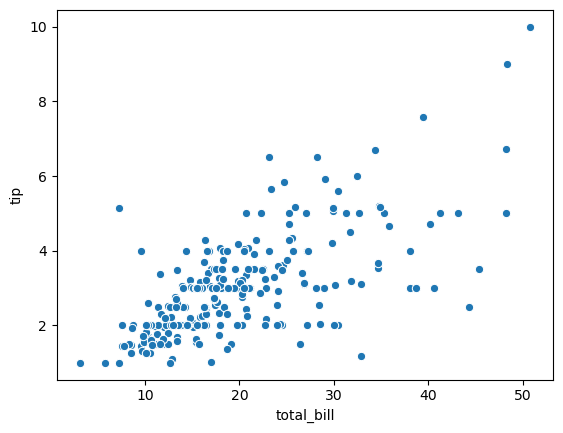

In [53]:
primeiro_plot.get_figure()

In [55]:
imagem = primeiro_plot.get_figure()

In [56]:
imagem.savefig('imagem.png')

# Análise 2 - Sobremesa

In [58]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


In [60]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,16.319140
std,9.832154,1.401468,0.810751,8.511748
min,3.070000,1.000000,1.000000,3.560000
25%,13.420000,2.000000,2.000000,10.680000
50%,17.920000,3.000000,2.000000,15.380000
75%,26.860000,3.680000,3.000000,19.510000
max,50.810000,10.000000,5.000000,71.030000


In [61]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,15.932318
std,8.255582,1.377190,1.017984,3.990701
min,7.250000,1.000000,1.000000,5.680000
25%,13.325000,2.000000,2.000000,13.690000
50%,17.590000,2.740000,2.000000,15.560000
75%,22.755000,3.505000,3.000000,18.500000
max,48.330000,9.000000,6.000000,29.200000


### Análise Gráficos

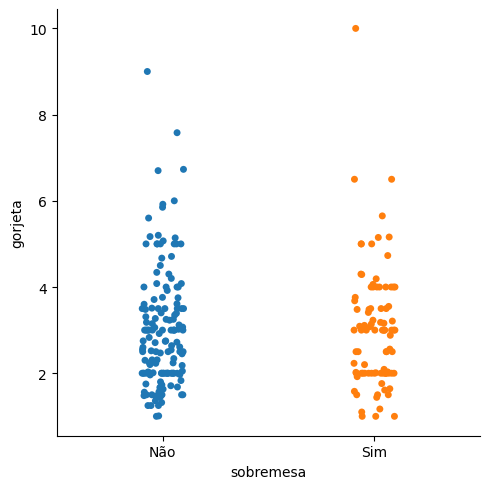

In [65]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

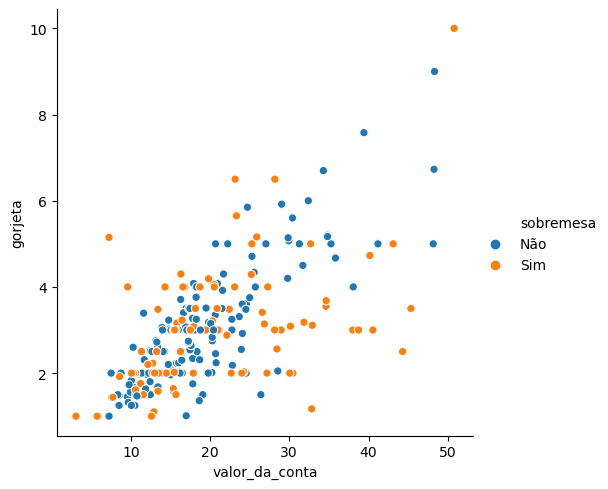

In [68]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

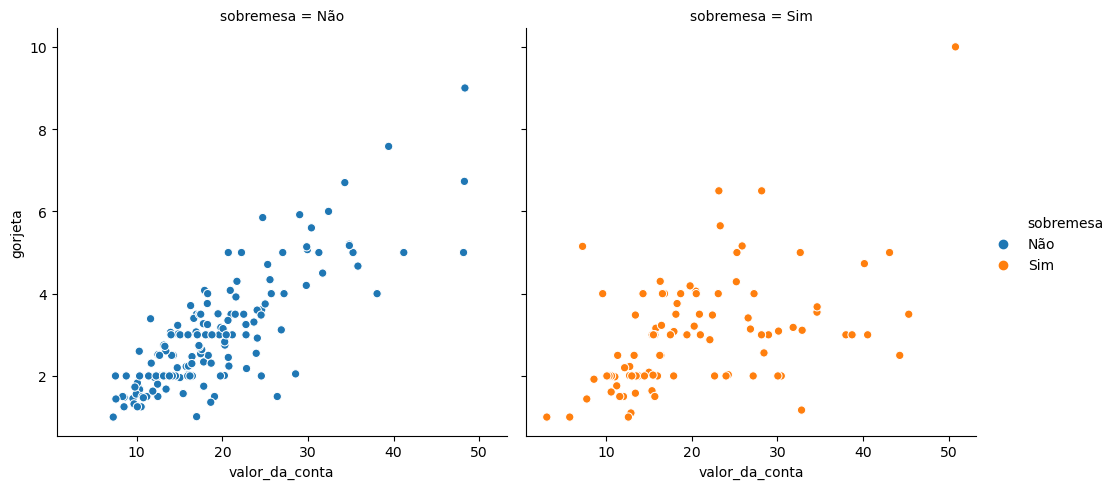

In [69]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

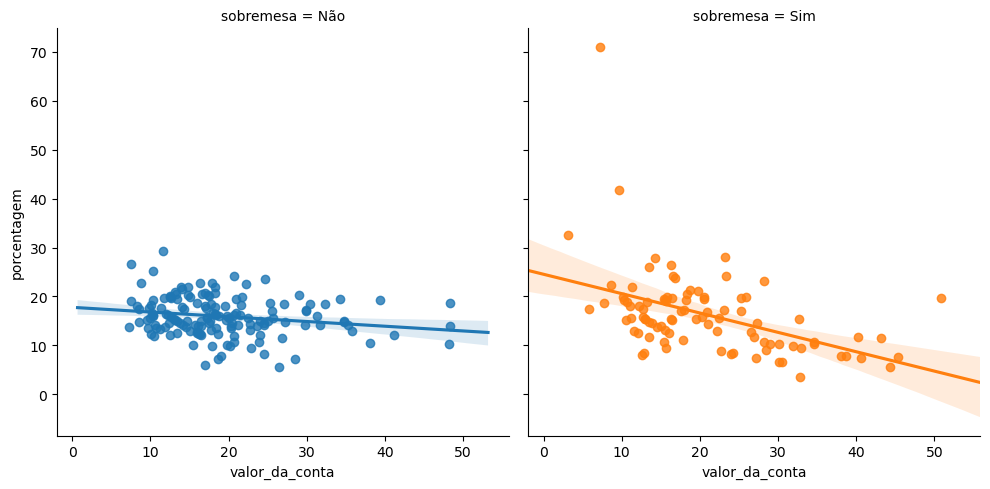

In [75]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', data=gorjetas)

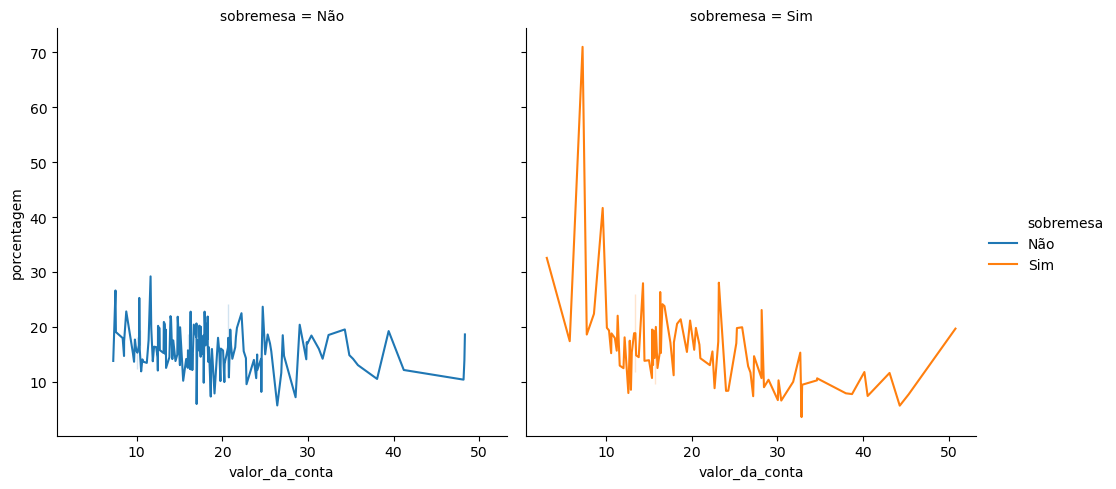

In [77]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)

## Visualmente, existe uma diferença no valor da gorjetas daqueles que pediram sobremesa e não pediram sobremesa 

# Teste de hipótese

## H<sup>null</sup>

### A distribuição da taxa de gorjeta é a mesma nos dois grupos

## H<sup>alt</sup>

### A distribuição da taxa de gorjeta não é a mesma nos dois grupos

In [78]:
from scipy.stats import ranksums

In [80]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [82]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [85]:
r = ranksums(sobremesa, sem_sobremesa)

In [86]:
print(f'O valro do p-value é {r.pvalue}')

O valro do p-value é 0.558850059321255


## H<sup>null</sup>

### A distribuição da taxa de gorjeta é a mesma nos dois grupos

# Análise 3 - Dia da semana

In [87]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


In [88]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta-feira', 'Sexta-Feira'], dtype=object)

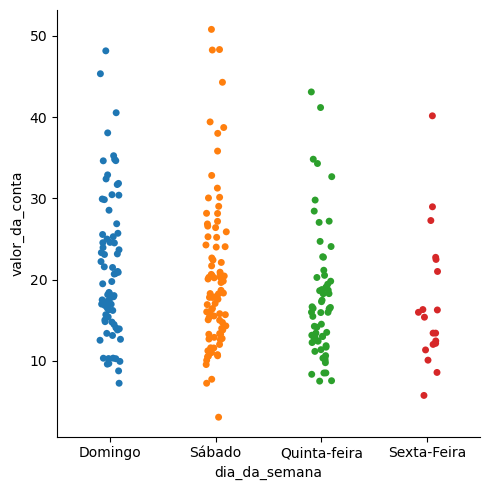

In [90]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

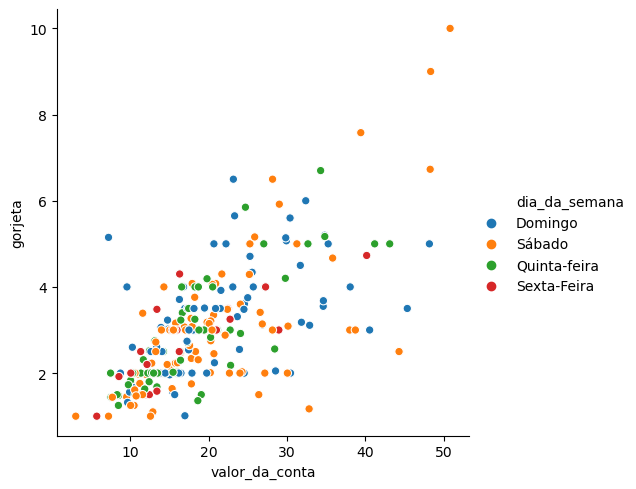

In [94]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

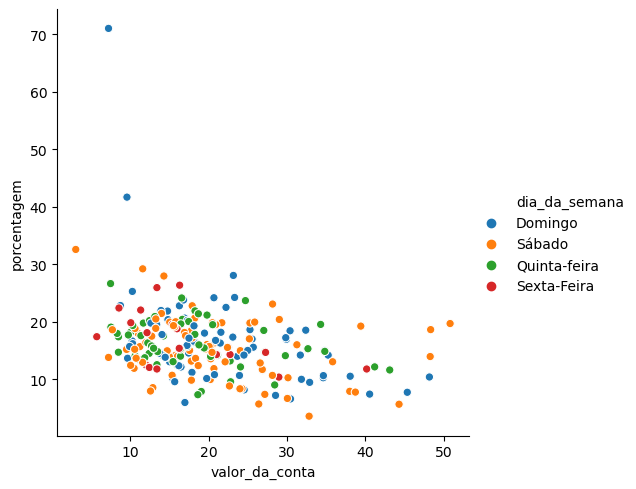

In [95]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

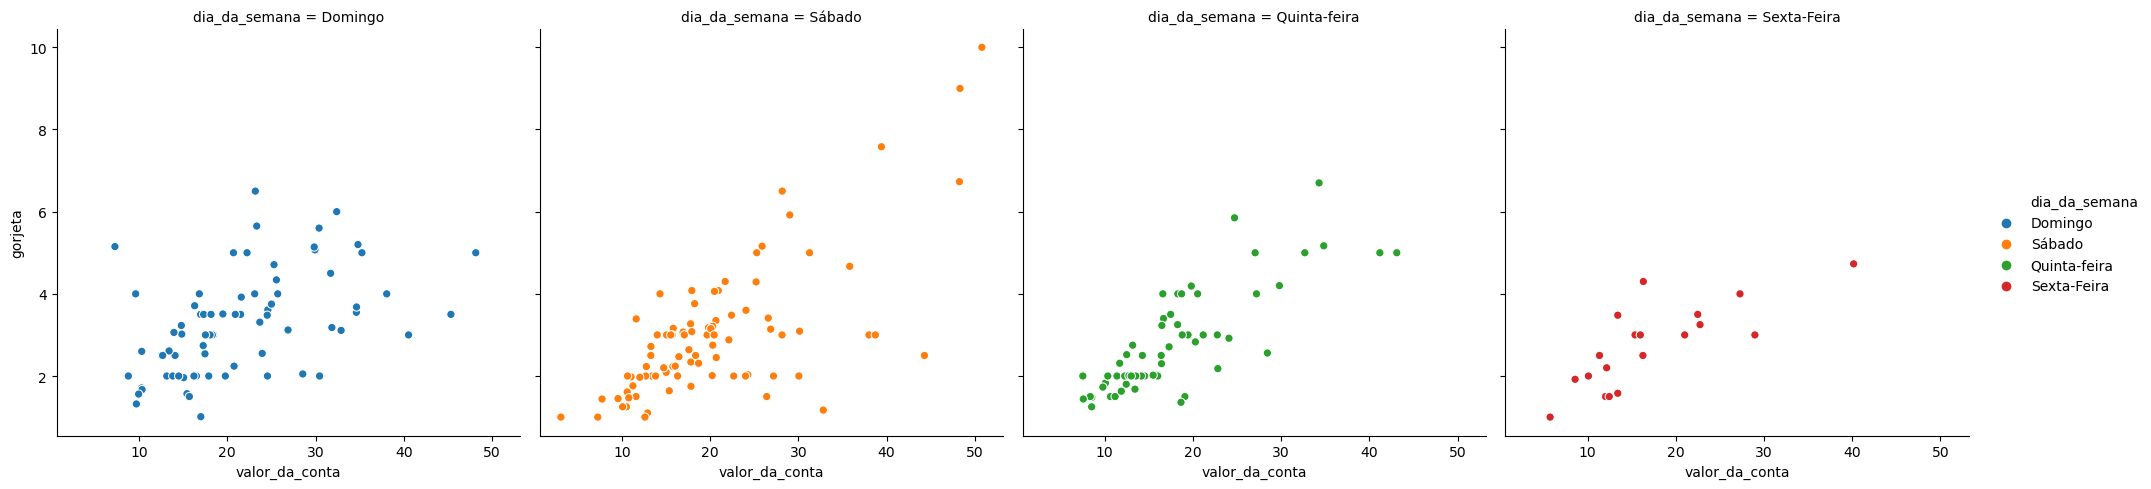

In [100]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

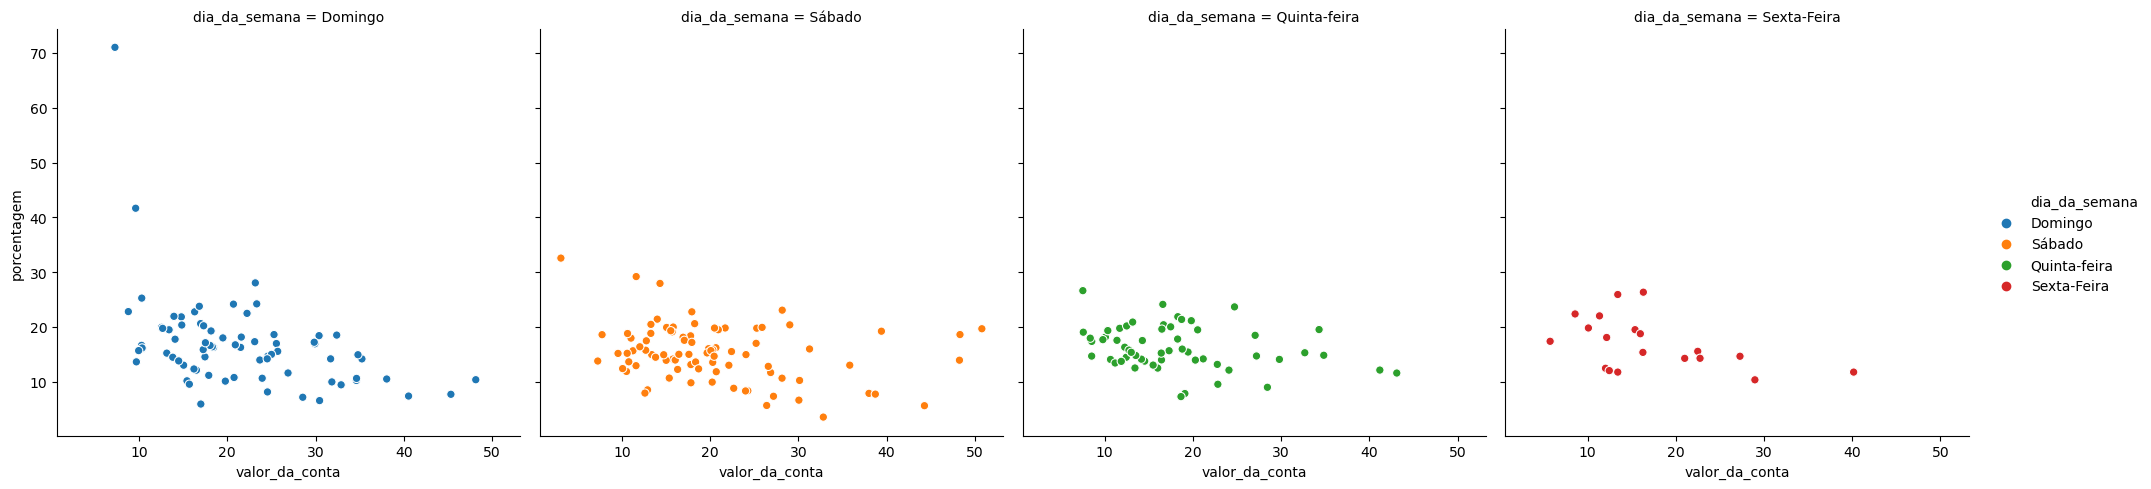

In [101]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

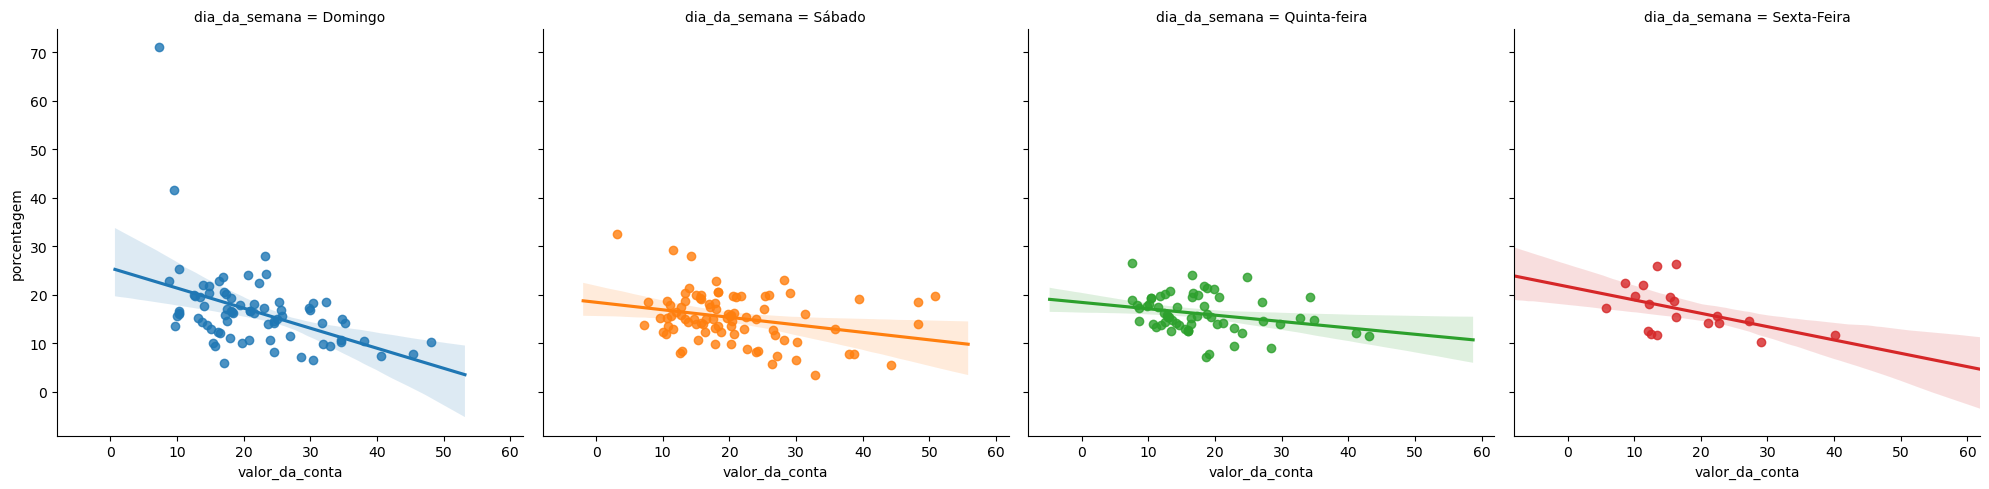

In [102]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [106]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [107]:
media_geral

2.99827868852459

In [116]:
print(f'A média geral das gorjetas é de: {media_geral_gorjetas}')

A média geral das gorjetas é de: 2.99827868852459


In [118]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

C:\Users\Senai\AppData\Local\Temp\ipykernel_4772\1513838919.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]


,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,16.689605
Quinta-feira,17.682742,2.771452,16.126452
Sexta-Feira,17.151579,2.734737,16.991579
Sábado,20.441379,2.993103,15.314598


In [121]:
print('Frequência dos dias:')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias:


Sábado          87
Domingo         76
Quinta-feira    62
Sexta-Feira     19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

## H<sub>null</sub>
### A distribuição do valor da conta é igual no sábado e no domingo

## H<sub>alt</sub>
### A distribuição do valor da conta não é igual no sábado e no domingo

In [122]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [123]:
valor_conta_domingo

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
186    20.90
187    30.46
188    18.15
189    23.10
190    15.69
Name: valor_da_conta, Length: 76, dtype: float64

In [124]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [125]:
valor_conta_sabado

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: valor_da_conta, Length: 87, dtype: float64

In [129]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print(f'O valor do p-value é {r2.pvalue}')

O valor do p-value é 0.3576728477868443


## H<sup>null</sup>
## A distribuição do valor da conta é igual no sábado e no domingo

# Análise 4 - Hora do dia

In [130]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


In [131]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

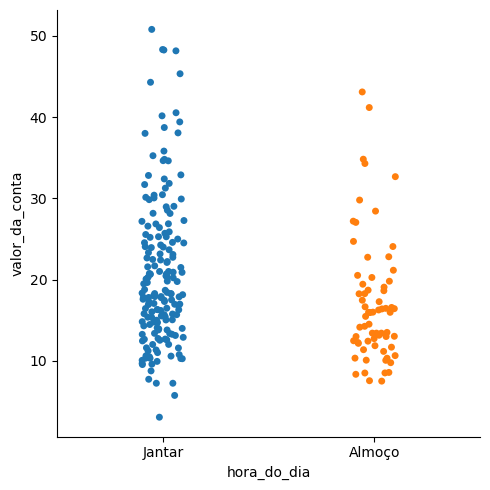

In [132]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

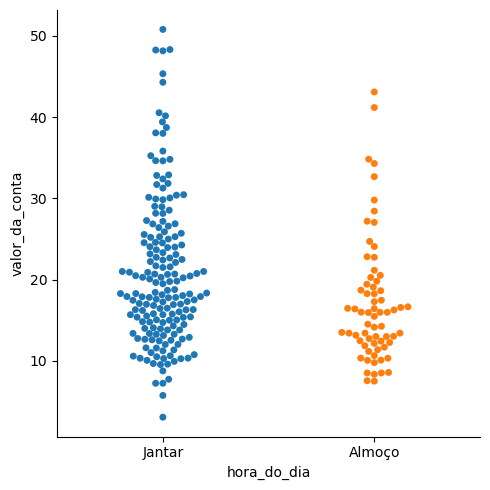

In [135]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

<Axes: xlabel='hora_do_dia', ylabel='valor_da_conta'>

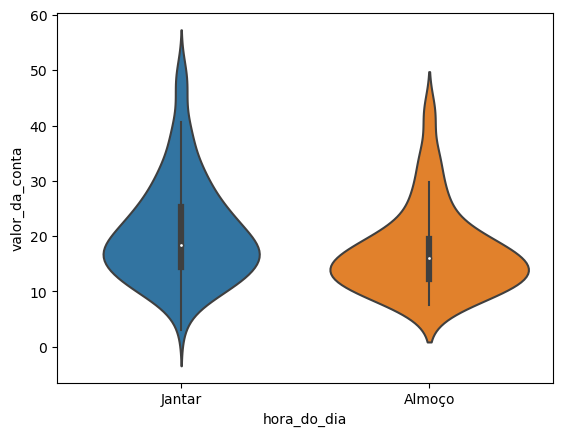

In [136]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

<Axes: xlabel='hora_do_dia', ylabel='valor_da_conta'>

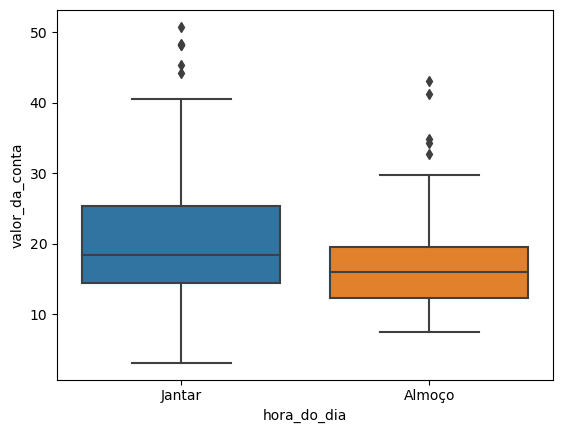

In [137]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [152]:
almoço = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

<Axes: xlabel='valor_da_conta'>

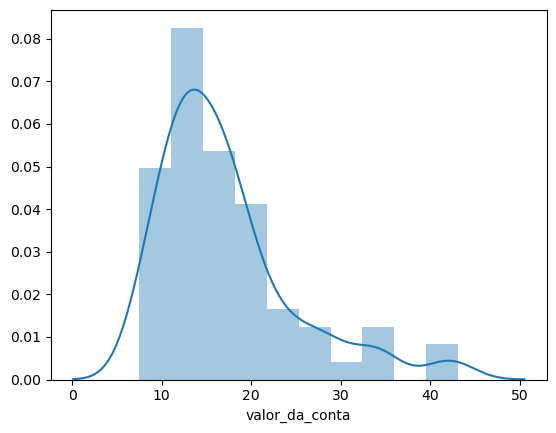

In [153]:
sns.distplot(almoço)

<Axes: xlabel='valor_da_conta'>

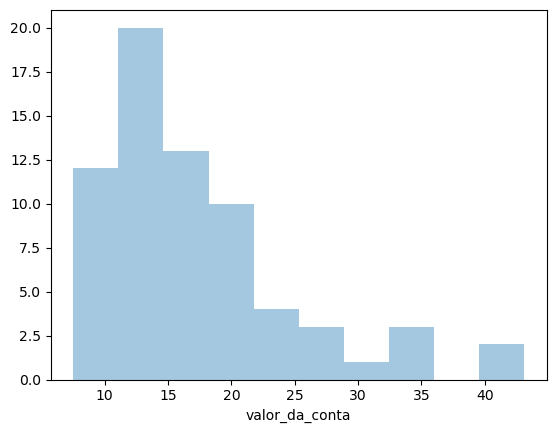

In [154]:
sns.distplot(almoço, kde=False)

In [155]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

<Axes: xlabel='valor_da_conta'>

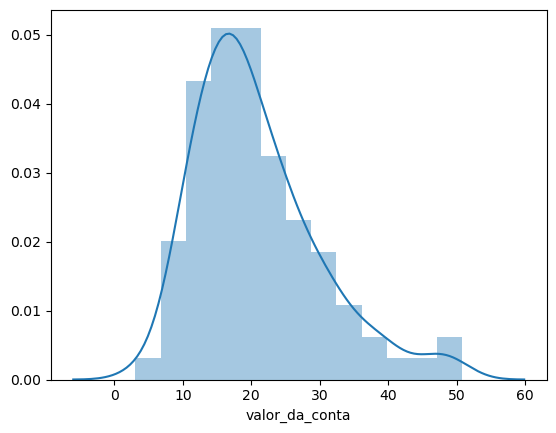

In [156]:
sns.distplot(jantar)

<Axes: xlabel='valor_da_conta'>

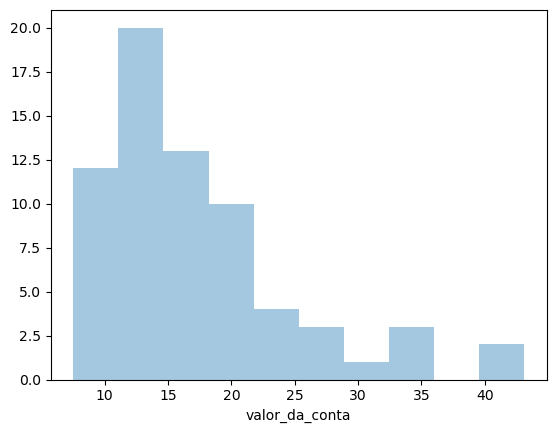

In [157]:
sns.distplot(almoço, kde=False)

In [158]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

C:\Users\Senai\AppData\Local\Temp\ipykernel_4772\932548386.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]


,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,16.411765
Jantar,20.797159,3.102670,15.951477


## Teste de hipótese

## H<sub>null</sub>
### A distribuição do valor da conta é igual no almoço e no jantar

## H<sub>alt</sub>
### A distribuição do valor da conta não é igual no almoço e no jantar

In [160]:
r3 = ranksums(jantar, almoço)
print(f'O valor do p-value é {r3.pvalue}')

O valor do p-value é 0.0011791039723641672


## H<sub>alt</sub>
### A distribuição do valor da conta não é igual no almoço e no jantar

# Teste 2

## H<sub>null</sub>
### A distribuição da taxa da gorjeta é igual no almoço e no jantar

## H<sub>alt</sub>
### A distribuição da taxa da gorjeta não é igual no almoço e no jantar

In [169]:
porcetagem_almoço = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem
porcetagem_almoço

77     14.71
78     13.18
79     15.67
80     15.43
81     20.41
       ...  
222    22.38
223    18.77
224    11.77
225    15.37
226    19.82
Name: porcentagem, Length: 68, dtype: float64

In [170]:
porcetagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem
porcetagem_jantar

0       5.94
1      16.05
2      16.66
3      13.98
4      14.68
       ...  
239    20.39
240     7.36
241     8.82
242     9.82
243    15.97
Name: porcentagem, Length: 176, dtype: float64

In [172]:
r4 = ranksums(porcetagem_almoço, porcetagem_jantar)
print(f'O valor do p-value é {r4.pvalue}')

O valor do p-value é 0.22831951519679017


## H<sub>null</sub>
### A distribuição da taxa da gorjeta é igual no almoço e no jantar